# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2384 Поглазов Никита Васильевич и Вовченко София Евгеньевна. Вариант №14.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

### Дискретное преобразование Фурье

$x[n]$ - периодический дискретный сигнал. Коэффициенты его спектра можно получить с помощью дискретного преобразования Фурье (ДПФ):

$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2\pi}{N} kn}$$

где $k$ — номер гармоники, $\omega_k = \frac{2\pi k}{N}$ — соответствующая круговая частота.

### Нерекурсивные фильтры

Передаточная функция нерекурсивных фильтров (FIR-фильтры) с симметричными коэффициентами $h_k = h_{-k}$:

$$H(\omega) = h_0 + 2\sum_{k=1}^{m} h_k \cos(k\omega)$$

где $h_k$ — коэффициенты фильтра, зависящие от метода сглаживания (линейное или полиномиальное).

### Связь спектров до и после фильтрации
$$ Y(z) = H(z)X(z),$$
где $Y(z)$ - спектр сигнала после фильтрации, $H(z)$ - передаточная функция, $X(z)$ - спектр сигнала до фильтрации

## Постановка задачи



Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

- Сформировать дискретный сигнал посредством дискретизации с шагом $ T = 1 $ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $ A_k\cos(\omega_kt + \varphi_k) $. Частота каждой из гармоник не должна превышать $ \pi $. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $ \pi $, изменяющимися с шагом $ \Delta\omega = 0.1\pi $. Амплитуды гармоник $ A_k $ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $ \varphi_k $ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($ N = 31 $).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(14)

In [3]:
size = 11
omega = np.linspace(0, np.pi, size)
A = np.random.randint(1, 12, size).astype(float)
A /= A.sum()
phi = np.random.uniform(0, 0.5, size)

In [4]:
def s(t: np.ndarray) -> np.ndarray:
    return np.sum(A * np.cos(omega * t.reshape(-1, 1) + phi), axis=1)

In [5]:
N = 31
T = 1

In [6]:
x = np.arange(0, N + 1, T)
x_analog = np.linspace(0, N, 1000)
y = s(x)

  - Визуализировать исходные аналоговый и дискретизированный сигналы.


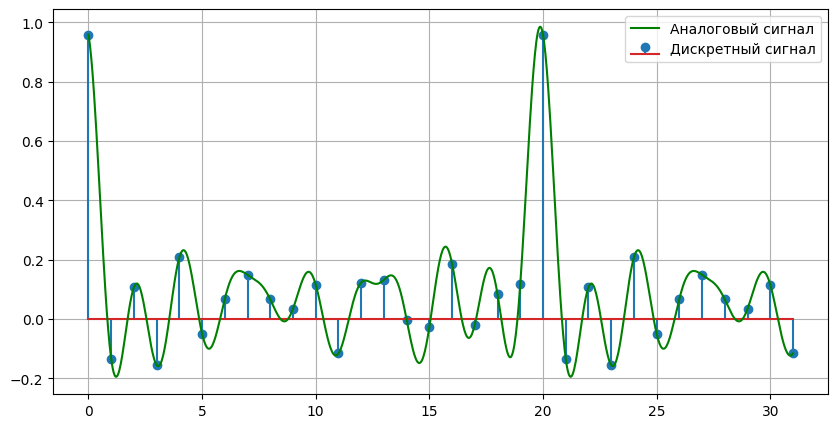

In [7]:
plt.figure(figsize=(10, 5))
plt.stem(x, y, label='Дискретный сигнал')
plt.plot(x_analog, s(x_analog), color='green', label='Аналоговый сигнал') 
plt.legend()
plt.grid()

  - С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

In [8]:
Y = np.fft.fft(y)

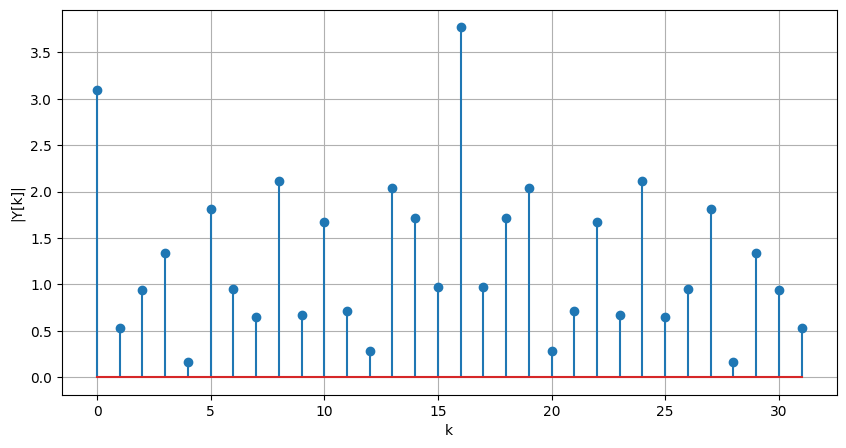

In [9]:
plt.figure(figsize=(10, 5))
plt.stem(range(N + 1), np.abs(Y))
plt.xlabel("k")
plt.ylabel('|Y[k]|')
plt.grid()

  - Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $ H(\omega) $ -- передаточной функции (частотной характеристики) фильтра.


Линейное сглаживание по $2h+1$ точкам:

$$
y_n=\frac1{2h+1}\sum^{k=n+h}_{k=n-h}s_k
$$

Передаточная функция (в общем виде):

$$
H_{2h+1}(\omega) = \frac{1}{2h + 1} \frac{\sin\left( (2h + 1) \frac{\omega}{2} \right)}{\sin\left( \frac{\omega}{2} \right)}
$$

In [ ]:
def apply_kernel(signal: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    pad_size = len(kernel) // 2
    y_padded = np.pad(signal, (pad_size, pad_size), mode='wrap')  # wrap для реализации круговой свертки
    return np.convolve(y_padded, kernel, mode='valid')  # valid для использования только тех отсчетов, которые не выходят за границы массива

In [11]:
y_l_smoothed_5 = apply_kernel(y, np.ones(5) / 5)
y_l_smoothed_9 = apply_kernel(y, np.ones(9) / 9)

  - Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.


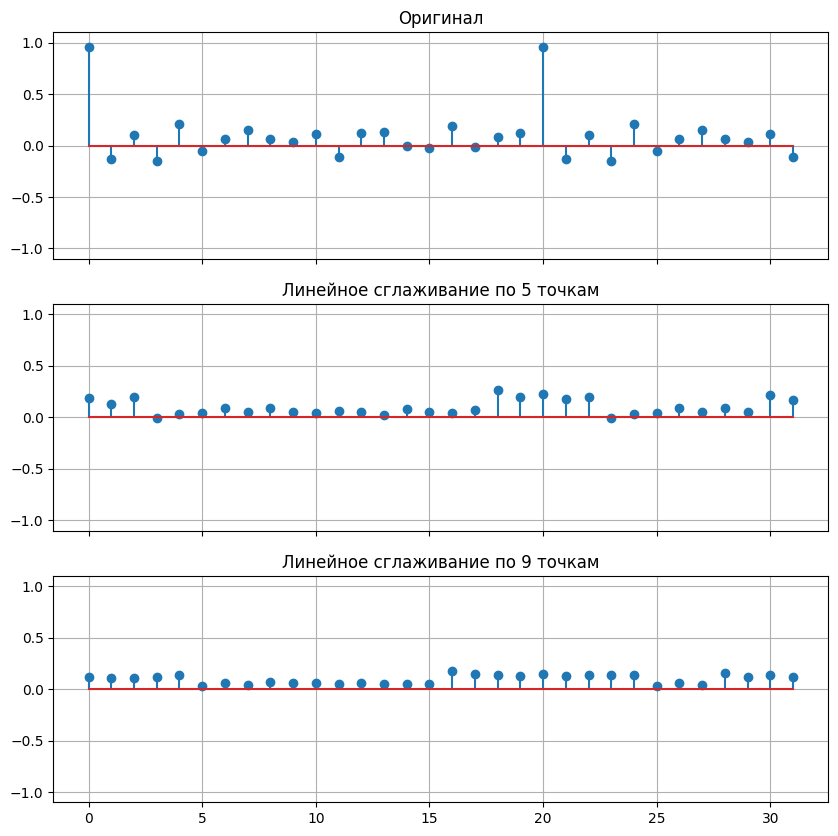

In [12]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

ys = y, y_l_smoothed_5, y_l_smoothed_9
titles = "Оригинал", "Линейное сглаживание по 5 точкам", "Линейное сглаживание по 9 точкам"

for ax, y_data, title in zip(axes, ys, titles):
    ax.set_title(title)
    ax.stem(x, y_data)
    ax.set_ylim(-1.1, 1.1)
    ax.grid()

  - С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.


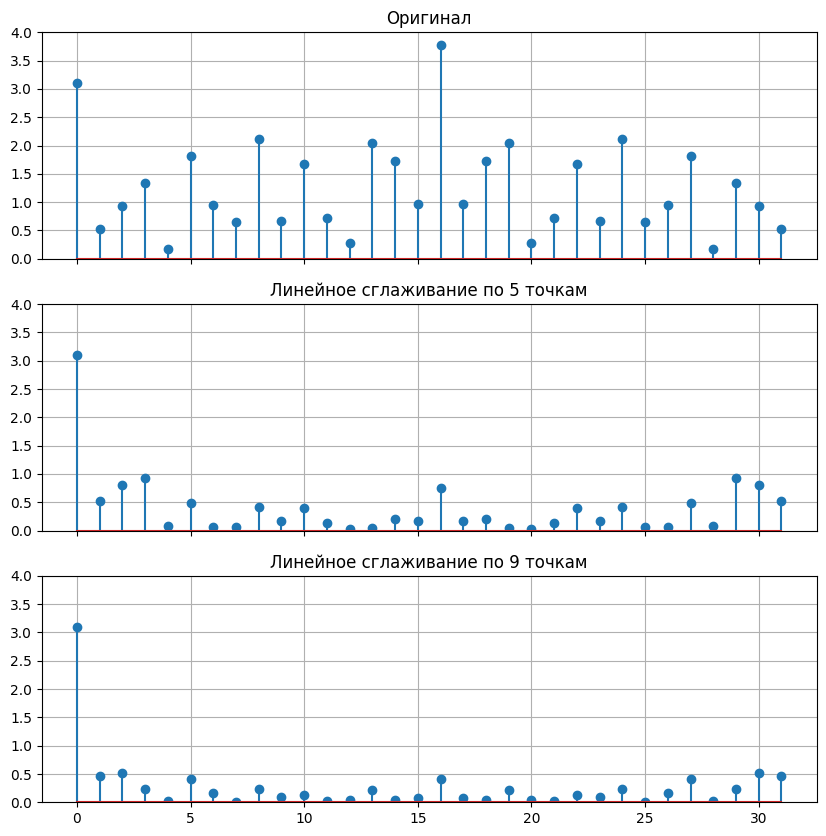

In [13]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

ys = y, y_l_smoothed_5, y_l_smoothed_9
titles = "Оригинал", "Линейное сглаживание по 5 точкам", "Линейное сглаживание по 9 точкам"

for ax, y_data, title in zip(axes, ys, titles):
    ax.set_title(title)
    Y = np.fft.fft(y_data)
    ax.stem(range(N + 1), np.abs(Y))
    ax.set_ylim(0, 4)
    ax.grid()

  - Проанализировать результат на соответствие значениям $ H(\omega) $. Сделать выводы.

In [14]:
def H_linear(omega: np.ndarray, window_size: int) -> np.ndarray:
    omega_half = omega / 2
    numerator = np.sin(omega_half * window_size)
    denominator = window_size * np.sin(omega_half)
    
    res = np.ones_like(omega)
    mask = np.abs(denominator) > 1e-10
    res[mask] = numerator[mask] / denominator[mask]
    return res

Text(0.5, 0, 'Индекс отсчета $k$')

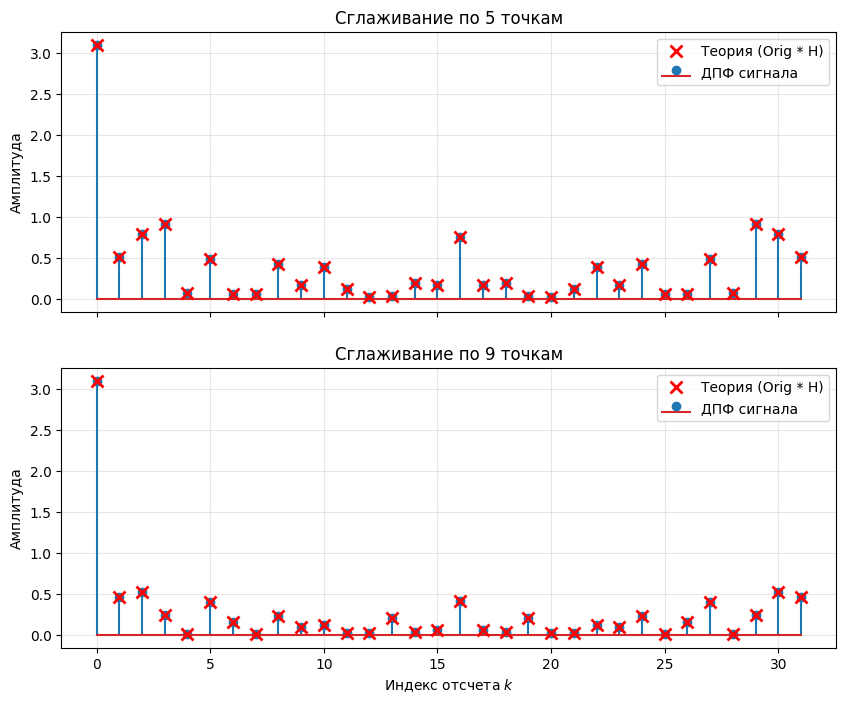

In [15]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

TOTAL_POINTS = N + 1 
omega = x / TOTAL_POINTS * 2 * np.pi 

Y_orig = np.fft.fft(y)
Y_orig_abs = np.abs(Y_orig)

ys = y_l_smoothed_5, y_l_smoothed_9
windows = 5, 9
titles = "Сглаживание по 5 точкам", "Сглаживание по 9 точкам"

for ax, y_data, window, title in zip(axes, ys, windows, titles):
    ax.set_title(title)
    
    Y_curr = np.fft.fft(y_data)
    
    markerline, stemlines, baseline = ax.stem(x, np.abs(Y_curr), label='ДПФ сигнала')
    plt.setp(stemlines, 'linewidth', 1.5)
    
    H_vals = np.abs(H_linear(omega, window))
    Y_theory = Y_orig_abs * H_vals
    
    ax.plot(x, Y_theory, 'rx', markersize=8, markeredgewidth=2, label='Теория (Orig * H)')
    ax.legend()

    ax.set_ylabel("Амплитуда")
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel("Индекс отсчета $k$")

На графиках видно точное соответствие теоретических (красные метки) и экспериментальных (синие отсчеты) значений спектра, это связано с использованием круговой свертки в реализации фильтра. Также проводились эксперименты с использованием линейной свертки, что давало незначительное отличие от теоретических значений.

  - Повторить п. 4--7 для следующих фильтров:
    - Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
    - Сглаживание полиномом 4-ой степени по 7 и 11 узлам.


### Сглаживание полиномом второй степени по пяти и девяти узлам

По пяти точкам:
$$y_n=\frac{1}{35}(-3s_{n-2}+12s_{n-1}+17s_n+12s_{n+1}-3s_{n+2})$$
Частотная характеристика:
$$H(\omega)=\frac{1}{35}(17+24\cos(\omega)-6\cos(2\omega))$$

По девяти точкам:
$$y_n=\frac{1}{231}(-21s_{n-4}+14s_{n-3}+39s_{n-2}+54s_{n-1}+59s_n+54s_{n+1}+39s_{n+2}+14s_{n+3}-21s_{n+4})$$
Частотная характеристика:
$$H(\omega)=\frac{1}{231}(59+108\cos(\omega)+78\cos(2\omega)+28\cos(3\omega)-42\cos(4\omega))$$

### Сглаживание полиномом четвёртой степени по семи и одиннадцати узлам

По семи точкам:
$$y_n=\frac{1}{231}(5s_{n-3}-30s_{n-2}+75s_{n-1}+131s_n+75s_{n+1}-30s_{n+2}+5s_{n+3})$$
Частотная характеристика:
$$H(\omega)=\frac{1}{231}(131+150\cos(\omega)-60\cos(2\omega)+10\cos(3\omega))$$

По одиннадцати точкам:
$$y_n=\frac{1}{429}(18s_{n-5}-45s_{n-4}-10s_{n-3}+60s_{n-2}+120s_{n-1}+143s_n+120s_{n+1}+60s_{n+2}-10s_{n+3}-45s_{n+4}+18s_{n+5})$$
Частотная характеристика:
$$H(\omega)=\frac{1}{429}(143+240\cos(\omega)+120\cos(2\omega)-20\cos(3\omega)-90\cos(4\omega)+36\cos(5\omega))$$


In [16]:
kernels = {
    "Poly 2 (5 points)": np.array([-3, 12, 17, 12, -3]) / 35,
    "Poly 2 (9 points)": np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231,
    "Poly 4 (7 points)": np.array([5, -30, 75, 131, 75, -30, 5]) / 231,
    "Poly 4 (11 points)": np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429
}

In [17]:
def calculate_H_theoretical(omega: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    M = len(kernel)
    center = M // 2
    
    H_vals = np.full_like(omega, kernel[center])
    
    for k in range(1, center + 1):
        H_vals += 2 * kernel[center + k] * np.cos(k * omega)
    
    return np.abs(H_vals)

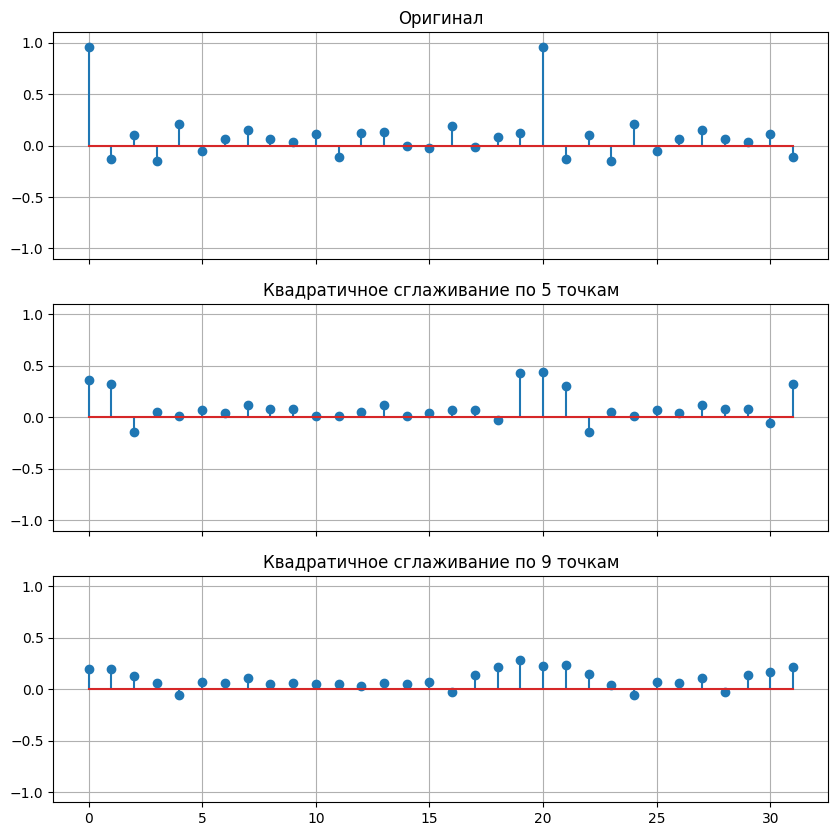

In [18]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

ys = y, apply_kernel(y, kernels['Poly 2 (5 points)']), apply_kernel(y, kernels['Poly 2 (9 points)'])
titles = "Оригинал", "Квадратичное сглаживание по 5 точкам", "Квадратичное сглаживание по 9 точкам"

for ax, y_data, title in zip(axes, ys, titles):
    ax.set_title(title)
    ax.stem(x, y_data)
    ax.set_ylim(-1.1, 1.1)
    ax.grid()

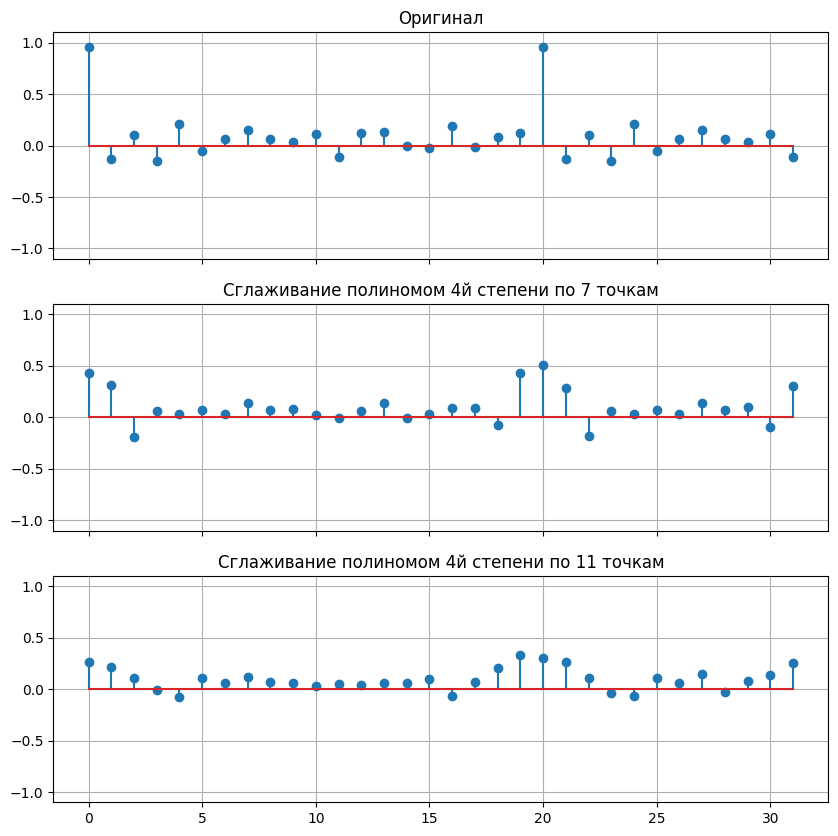

In [19]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

ys = y, apply_kernel(y, kernels['Poly 4 (7 points)']), apply_kernel(y, kernels['Poly 4 (11 points)'])
titles = "Оригинал", "Сглаживание полиномом 4й степени по 7 точкам", "Сглаживание полиномом 4й степени по 11 точкам"

for ax, y_data, title in zip(axes, ys, titles):
    ax.set_title(title)
    ax.stem(x, y_data)
    ax.set_ylim(-1.1, 1.1)
    ax.grid()

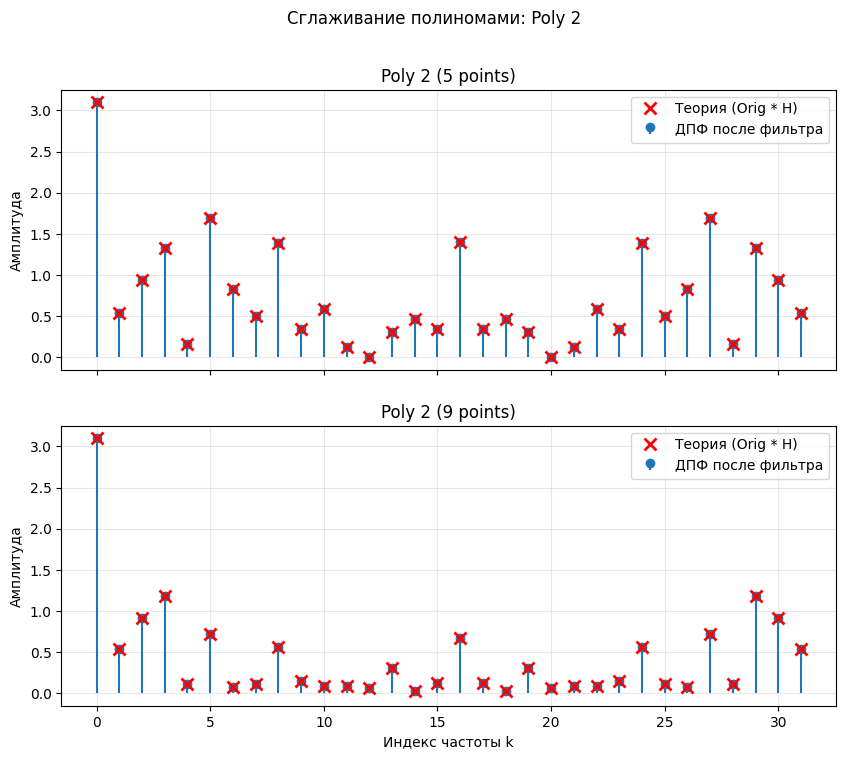

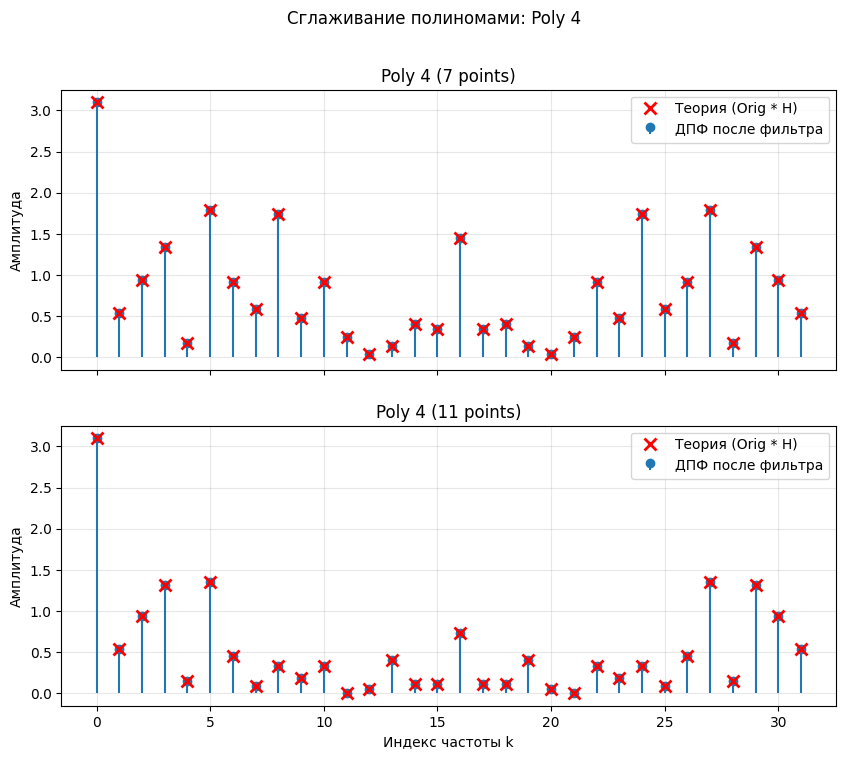

In [20]:
Y_orig_abs = np.abs(np.fft.fft(y))

groups = [
    ["Poly 2 (5 points)", "Poly 2 (9 points)"],
    ["Poly 4 (7 points)", "Poly 4 (11 points)"]
]

for group_names in groups:
    fig, axes = plt.subplots(len(group_names), 1, figsize=(10, 8), sharex=True)
    
    fig.suptitle(f"Сглаживание полиномами: {group_names[0].split('(')[0]}")
    
    for ax, name in zip(axes, group_names):
        kernel = kernels[name]
        
        y_smooth = apply_kernel(y, kernel)
        
        Y_smooth_abs = np.abs(np.fft.fft(y_smooth))
        
        H_teor = calculate_H_theoretical(omega, kernel)
        Y_teor = Y_orig_abs * H_teor
        
        ax.set_title(name)

        markerline, stemlines, baseline = ax.stem(x, Y_smooth_abs, label='ДПФ после фильтра', basefmt=" ")
        plt.setp(stemlines, 'linewidth', 1.5)
        
        ax.plot(x, Y_teor, 'rx', markersize=8, markeredgewidth=2, label='Теория (Orig * H)')
        
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_ylabel("Амплитуда")

    axes[-1].set_xlabel("Индекс частоты k")

Анализируя графики, можно сказать, что фильтр ещё более прозрачно пропускает полезный сигнал при увеличении степени полинома до 4-го. Его полоса пропускания расширяется, и амплитуды гармоник в низко- и среднечастотной областях практически не искажаются, при этом значительное подавление наблюдается только уже в области самых высоких частот. Можно увидеть, что с увеличением числа точек усиливается и подавление высокочастотного шума, но исходный сигнал так же передается с высокой точностью.


## Выводы

В лабораторной работе был вычислен спектр с использованием ДПФ для сформированного сигнала, который представляет собой сумму косинусоид, также было исследовано действие различных нерекурсивных методов сглаживания.

Были применены три подхода к фильтрации: линейное сглаживание (5 и 9 точек) - при нем шум подавляется эффективно, но однако форма полезного сигнала заметно искажается; сглаживание полиномом 2-й степени (5 и 9 точек) - более широкая полоса пропускания позволяет лучше сохранять форму сигнала, но одновременно снижает степень подавления высокочастотных компонентов; сглаживание полиномом 4-й степени (7 и 11 точек) - форма сигнала искажается меньше всего по сравнению с другими подходами фильтрации, а подавление затрагивает главным образом наиболее высокочастотные составляющие.

Таким образом, характеристики сглаживания и ширина полосы пропускания определяются двумя ключевыми параметрами: степенью полинома (при ее увеличении расширяется полоса пропускания, но уменьшается эффективность подавления шума) и числом точек сглаживания (чем больше точек, тем более узкой становится полоса пропускания и сильнее подавляются высокие частоты).